In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

Prepare data

In [10]:
df = pd.read_csv('data/DatasetEV3.csv')
df = df[df['100% representative']==1]

df['halotolerance'] = df['halotolerance'].replace('halotolerant', 'non halophile')
df['halotolerance'] = df['halotolerance'].replace('extreme halophile', 'halophile')

my_pal = {"non halophile": 'lightgrey', "halophile": 'lightgrey'}

Statistical tests

In [11]:
group1 = df[df['halotolerance'] == 'non halophile']['Rate mean [s-1]'].dropna()
group2 = df[df['halotolerance'] == 'halophile']['Rate mean [s-1]'].dropna()

# Mann-Whitney U test
statistic, pvalue = mannwhitneyu(group1, group2)

if pvalue < 0.05:
    print(f'Mann-Whitney U test: The two groups are significantly different. p = {pvalue}')
else:
    print('Mann-Whitney U test: The two groups are not significantly different')

Mann-Whitney U test: The two groups are not significantly different


Plot

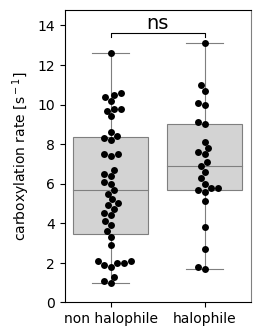

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(2.4, 3.8))

sns.boxplot(data=df, x='halotolerance', y='Rate mean [s-1]', palette=my_pal, order=["non halophile", "halophile"], linewidth=.8, showfliers=False)
sns.swarmplot(data=df, x='halotolerance', y='Rate mean [s-1]', color='black', order=["non halophile", "halophile"])


axs.spines.right.set_edgecolor('gray')
axs.set_ylabel('carboxylation rate [s$^-$$^1$]')
axs.set_xlabel('')
axs.set_ylim(0, 14.8)


if pvalue <= 0.0001:
    star = '****'
elif pvalue <= 0.001:
    star = '***'
elif pvalue <= 0.01:
    star = '**'
elif pvalue <= 0.05:
    star = '*'
else:
    star = 'ns'
    
x1, x2 = 0, 1
y, h, col = df['Rate mean [s-1]'].max() + 0.1, 0.1, 'k'
axs.plot([0, 0, 1, 1], [13.4, 13.6, 13.6, 13.4], lw=.8, c = 'black')
axs.text(0.5, 13.65, star, ha='center', va='bottom', fontsize=14)

plt.savefig(r'plots/salinity.png', dpi=300, bbox_inches='tight')

plt.show()
